<ipython-input-8-43d1a3b5c31d>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feature].fillna(data[feature].mean(), inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/


Classification Report (Random Forest):
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       317
    Moderate       0.98      1.00      0.99       540
   Unhealthy       1.00      0.98      0.99       384

    accuracy                           0.99      1241
   macro avg       0.99      0.99      0.99      1241
weighted avg       0.99      0.99      0.99      1241


Confusion Matrix (Random Forest):
[[317   0   0]
 [  0 540   0]
 [  0   9 375]]


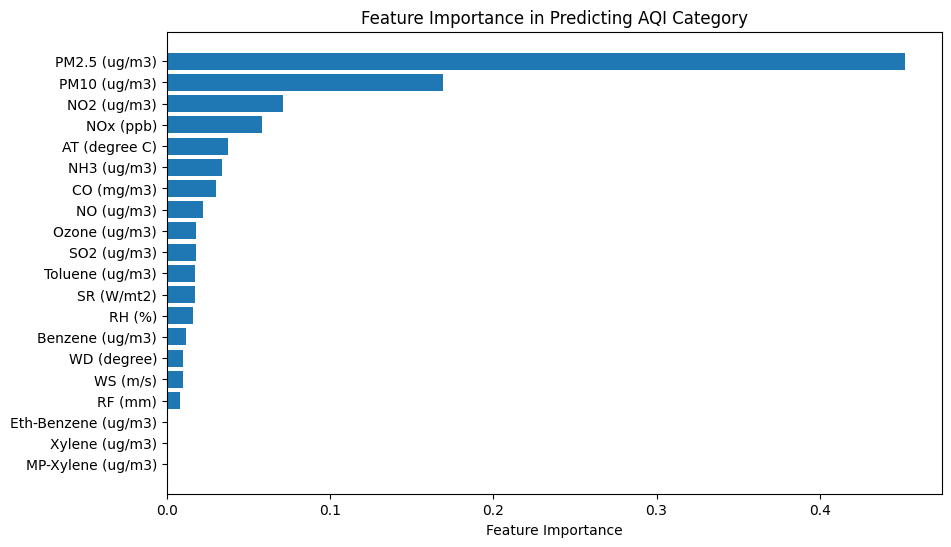

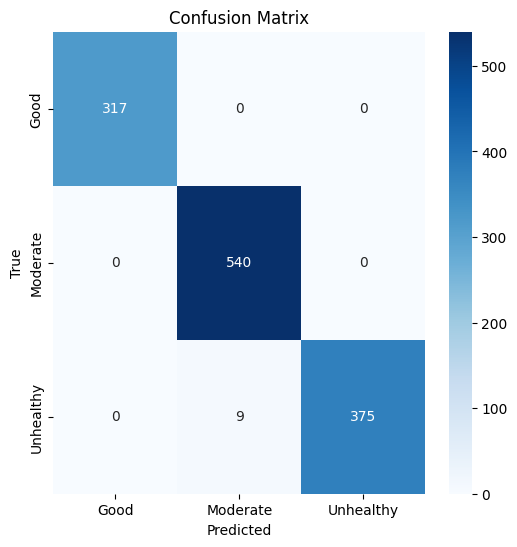

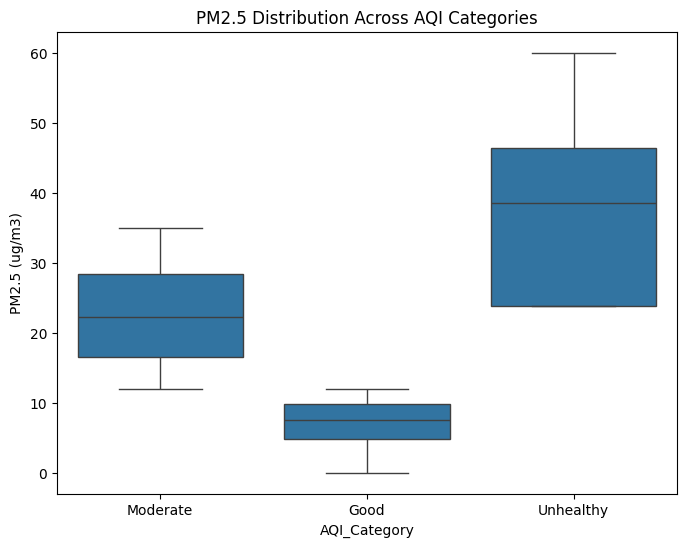

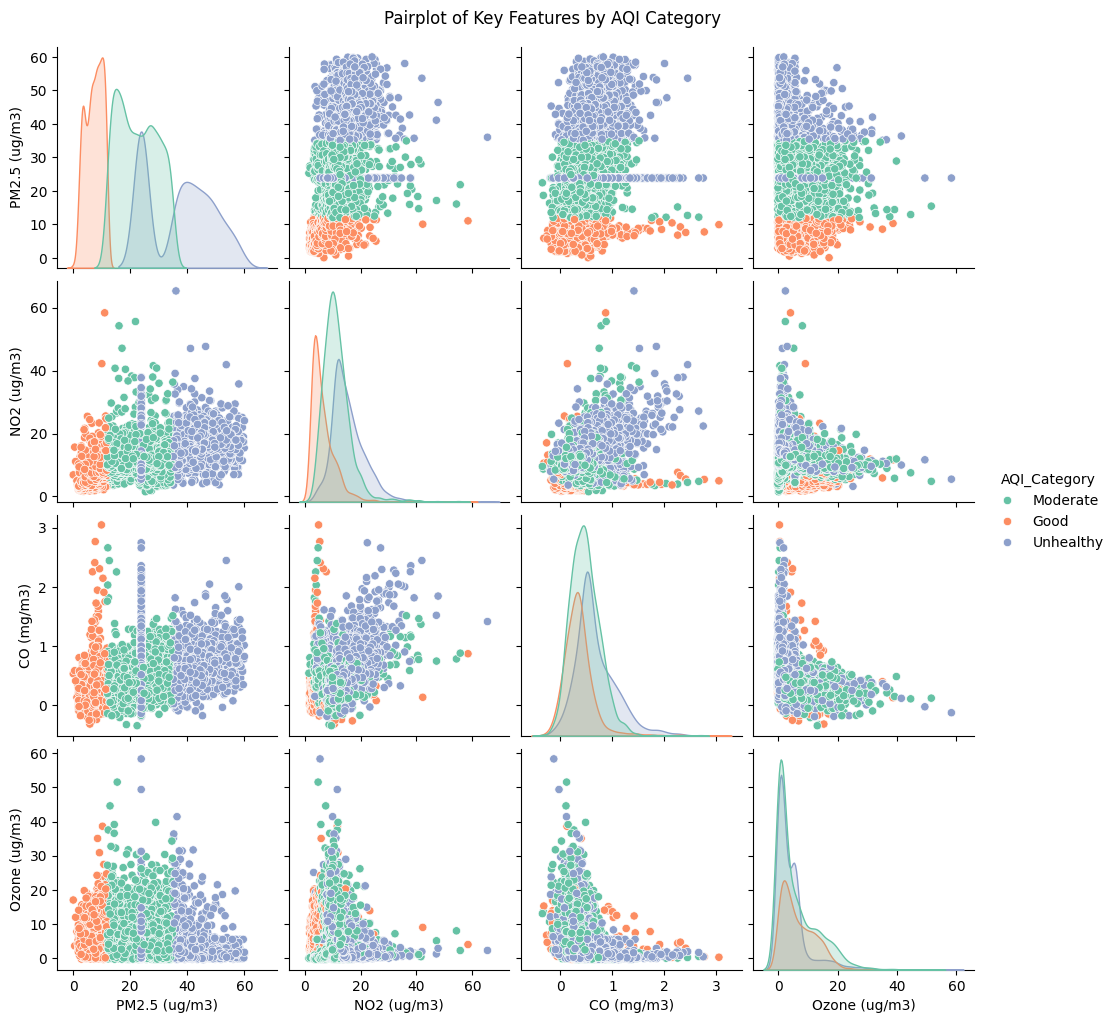

In [ ]:

le = LabelEncoder()import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("air_quality_train.csv")

# Clean up column names (strip extra spaces if needed)
data.columns = data.columns.str.strip()

# Add a mock AQI_Category column for demonstration
# In practice, you would have a predefined AQI Category, here it's mocked for illustration
data['AQI_Category'] = data['PM2.5 (ug/m3)'].apply(lambda x: 'Good' if x < 12 else ('Moderate' if x < 35 else 'Unhealthy'))

# Define features and target
features = [
    "PM2.5 (ug/m3)", "PM10 (ug/m3)", "NO (ug/m3)", "NO2 (ug/m3)", "NOx (ppb)",
    "NH3 (ug/m3)", "SO2 (ug/m3)", "CO (mg/m3)", "Ozone (ug/m3)", "Benzene (ug/m3)",
    "Toluene (ug/m3)", "Eth-Benzene (ug/m3)", "MP-Xylene (ug/m3)", "RH (%)",
    "WS (m/s)", "WD (degree)", "SR (W/mt2)", "RF (mm)", "Xylene (ug/m3)", "AT (degree C)"
]

# Handle missing data (filling with mean of the column)
for feature in features:  # Iterate through the specified numeric features
    data[feature].fillna(data[feature].mean(), inplace=True)

# Prepare feature matrix (X) and target vector (y)
X = data[features]
y = data['AQI_Category']

# Encode target variable (AQI_Category)
y_encoded = le.fit_transform(y)

# Standardize feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_preds = rf_model.predict(X_test)

# Evaluate the model's performance
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, rf_preds, target_names=le.classes_))

print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, rf_preds))

# Visualizations

# 1. Feature Importance Visualization
feature_importances = rf_model.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Predicting AQI Category")
plt.show()

# 2. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# 3. Distribution of PM2.5 (ug/m3) for Different AQI Categories
plt.figure(figsize=(8, 6))
sns.boxplot(x='AQI_Category', y='PM2.5 (ug/m3)', data=data)
plt.title("PM2.5 Distribution Across AQI Categories")
plt.show()

# 4. Pairplot of Some Key Features
sns.pairplot(data[['PM2.5 (ug/m3)', 'NO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'AQI_Category']], hue='AQI_Category', palette='Set2')
plt.suptitle("Pairplot of Key Features by AQI Category", y=1.02)
plt.show()


In [8]:
df.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Toluene (ug/m3),Eth-Benzene (ug/m3),MP-Xylene (ug/m3),RH (%),WS (m/s),WD (degree),SR (W/mt2),RF (mm),Xylene (ug/m3),AT (degree C)
0,2022-09-29 16:00:00,2022-09-29 17:00:00,12.462712,16.097392,0.134938,4.325129,NaN,13.474628,4.821302,0.618234,...,NaN,NaN,NaN,92.018420,0.133542,205.491966,65.821973,-0.285760,NaN,30.71
1,2022-09-29 17:00:00,2022-09-29 18:00:00,9.595863,14.954350,0.307633,4.101504,2.679533,13.151286,3.857990,1.133142,...,NaN,NaN,NaN,98.592178,0.807967,35.006207,23.606208,0.236760,NaN,28.90
2,2022-09-29 18:00:00,2022-09-29 19:00:00,8.004166,18.049856,0.510151,3.669630,2.392240,15.324940,6.204308,1.067838,...,NaN,NaN,NaN,98.118585,0.566759,38.433779,23.075488,0.075608,NaN,28.18
3,2022-09-29 19:00:00,2022-09-29 20:00:00,7.905083,14.831857,0.817394,4.047494,2.932445,12.675942,4.049255,1.409800,...,NaN,NaN,NaN,98.239935,0.238826,28.223303,23.251744,0.049844,NaN,27.88
4,2022-09-29 20:00:00,2022-09-29 21:00:00,8.876985,19.369062,1.089787,3.941653,2.938013,17.501724,5.434113,1.591742,...,NaN,NaN,NaN,98.536991,0.385219,27.269734,22.914977,-0.060810,NaN,27.42
